## DataAnalysis
    - Every Data is numerical data
    - Data is imbalanced. (Outcome : 0(11970), outcome : 1(1682)) == 100 : 13)
    - Feature : 72, Outcome(Label) : 1
    - Categorical Data : age, UTI, document_sexo, The rest of the data is all Continuous.

In [1]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import matplotlib as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
import joypy
import shap
from collections import Counter
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

import math

import os
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [2]:
base_path = "Dataset/heg_sample_data.csv"

dataset = pd.read_csv(base_path)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13652 entries, 0 to 13651
Data columns (total 73 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              13652 non-null  int64  
 1   days_from_entrance                      13652 non-null  float64
 2   age                                     13652 non-null  float64
 3   document.sexo                           13652 non-null  float64
 4   UTI                                     13652 non-null  float64
 5   delta_collect_timestamp_t-t1            13652 non-null  float64
 6   delta_collect_timestamp_t1-t2           13652 non-null  float64
 7   delta_collect_timestamp_t2-t3           13652 non-null  float64
 8   delta_collect_timestamp_t3-t4           13652 non-null  float64
 9   document.freq_cardiaca(t)               13652 non-null  float64
 10  document.freq_cardiaca(t-1)             13652 non-null  fl

In [3]:
#Every features has no NaN.
for col in dataset.columns:
    print(f"{col} feature has the number of NaN value {dataset[col].isna().sum()}")

Unnamed: 0 feature has the number of NaN value 0
days_from_entrance feature has the number of NaN value 0
age feature has the number of NaN value 0
document.sexo feature has the number of NaN value 0
UTI feature has the number of NaN value 0
delta_collect_timestamp_t-t1 feature has the number of NaN value 0
delta_collect_timestamp_t1-t2 feature has the number of NaN value 0
delta_collect_timestamp_t2-t3 feature has the number of NaN value 0
delta_collect_timestamp_t3-t4 feature has the number of NaN value 0
document.freq_cardiaca(t) feature has the number of NaN value 0
document.freq_cardiaca(t-1) feature has the number of NaN value 0
document.freq_cardiaca(t-2) feature has the number of NaN value 0
document.freq_cardiaca(t-3) feature has the number of NaN value 0
document.freq_cardiaca(t-4) feature has the number of NaN value 0
document.freq_respiratoria(t) feature has the number of NaN value 0
document.freq_respiratoria(t-1) feature has the number of NaN value 0
document.freq_respira

In [8]:
for i in dataset.columns:
  print(i, '\n', dataset[i].unique(), '\n')

Unnamed: 0 
 [    0     1     2 ... 13649 13650 13651] 

days_from_entrance 
 [ 4.81160014e-01  1.83769464e+00  2.26809771e-01 -3.66674128e-01
 -2.81890714e-01  5.72429430e-02  3.96376600e-01 -4.51457542e-01
 -1.97107300e-01  3.27901268e+00  1.42026357e-01  5.65943428e-01
  9.89860500e-01  1.15942733e+00  1.32899416e+00  8.20293671e-01
 -1.12323886e-01  9.05077085e-01 -2.75404713e-02  2.93987903e+00
  3.11593186e-01  6.50726843e-01  1.07464391e+00  1.92247806e+00
  2.26161171e+00  3.02466244e+00  7.35510257e-01  1.41377757e+00
  1.24421074e+00  1.75291123e+00  1.66812781e+00  1.49856099e+00
  2.00726147e+00  2.43117854e+00  2.60074537e+00  2.17682830e+00
  4.21163024e+00  2.85509561e+00  2.68552878e+00  2.34639513e+00
  2.09204488e+00  1.58334440e+00  3.19422927e+00  6.33121560e+00
  3.78771317e+00  4.29641366e+00  4.72033073e+00  3.87249658e+00
  4.12684683e+00  2.51596196e+00  3.61814634e+00  5.48338145e+00
  1.53182575e+01  2.77031220e+00  4.38119707e+00  4.04206341e+00
  3.95728000

0.0    11970
1.0     1682
Name: outcome, dtype: int64


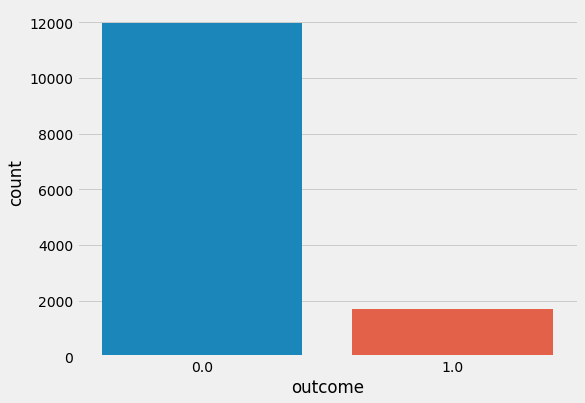

In [75]:
print(dataset['outcome'].value_counts())

#train_data['Fraud_Type'].value_counts().plot(kind = 'bar')
sns.countplot(x= 'outcome', data = dataset)
#plt.xticks(rotation = 90)
plt.show()

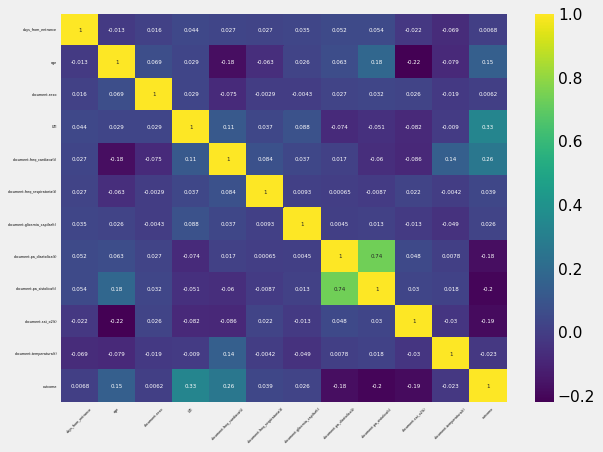

In [77]:
plt.figure(dpi=80)
sns.heatmap(dataset.iloc[:,[1,2,3,4,9,14,19,24,29,34,39,72]].corr(), cmap='viridis', annot=True, annot_kws={"size":5})
plt.tick_params(axis="x", labelsize=3)
plt.tick_params(axis="y", labelsize=3)
plt.xticks(rotation=45)
plt.show()

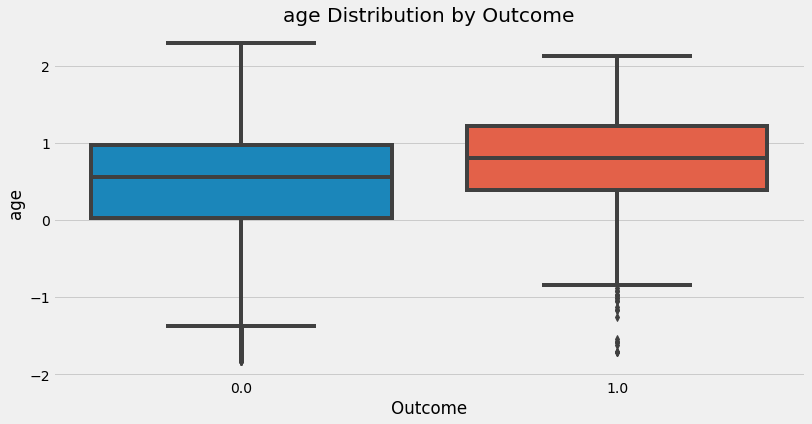

In [14]:
# Outcome을 기반으로 데이터 분포 확인
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='outcome', y='age')
plt.title('age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('age')
plt.show()

In [18]:
selected_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI',                 
    'document.freq_cardiaca(t)',  
    'document.freq_respiratoria(t)',  
    'document.glicemia_capilar(t)',  
    'document.pa_diastolica(t)',    
    'document.pa_sistolica(t)',     
    'document.sat_o2(t)',           
    'document.temperatura(t)',       
    'outcome'
]

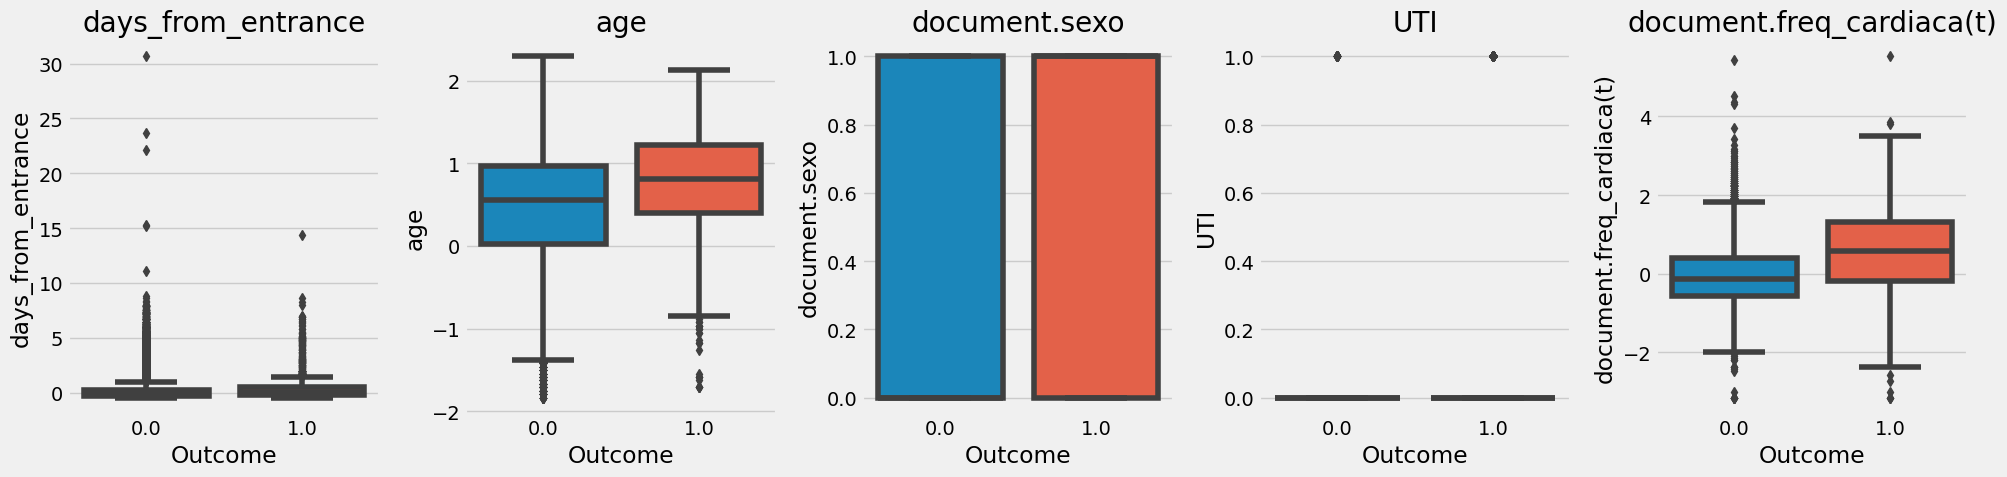

In [38]:
n_features = len(selected_features[:-1])
nrows = 1  
ncols = math.floor(n_features // 2)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[:ncols]):  
    sns.boxplot(data=dataset, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

5


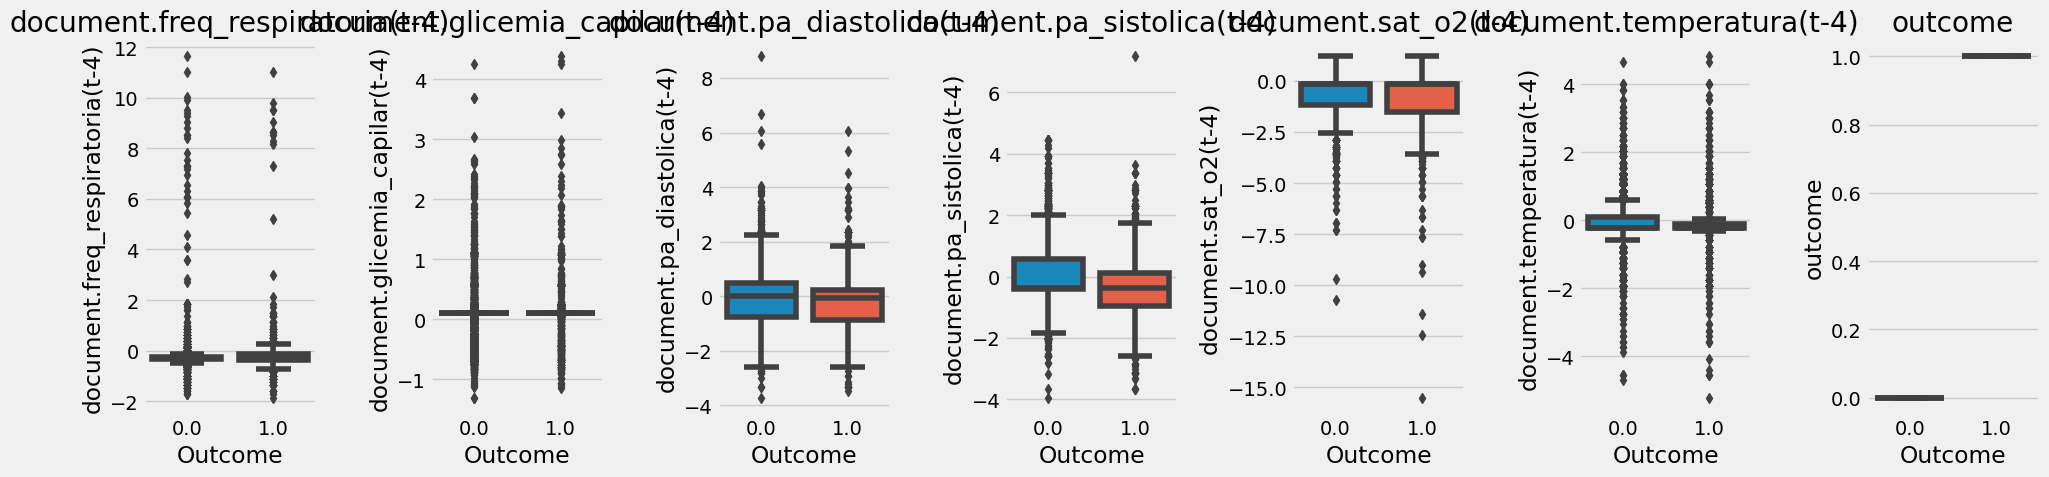

In [49]:
n_features = len(selected_features[:-1])
n_cols = n_features//2
n_rows = 1
print(n_cols)

remaining_features = selected_features[n_cols:]
fig, axes = plt.subplots(1, len(remaining_features), figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[ncols:n_features+1]):  
    sns.boxplot(data=dataset, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

In [55]:
##t-4 데이터만 뽑아서 outcome이랑 결과보기.
need_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI', 
    'outcome'
]

dataset_t4 = dataset.filter(like="(t-4)", axis=1)
dataset_t4 = pd.concat([dataset_t4, dataset[need_features]], axis = 1)
dataset_t4.head()

,document.freq_cardiaca(t-4),document.freq_respiratoria(t-4),document.glicemia_capilar(t-4),document.pa_diastolica(t-4),document.pa_sistolica(t-4),document.sat_o2(t-4),document.temperatura(t-4),days_from_entrance,age,document.sexo,UTI,outcome
0,0.258938,-0.305172,0.100676,0.026804,-0.310084,-1.523816,-0.232898,0.481160,-0.430375,1.0,0.0,0.0
1,1.397064,-0.305172,0.100676,-0.947430,-0.218025,-0.140941,-0.232898,1.837695,0.230175,1.0,0.0,0.0
2,0.258938,-0.292677,0.100676,0.026804,-0.389533,-0.140941,-0.232898,0.226810,-0.719366,1.0,0.0,0.0
3,0.820968,-0.292677,0.100676,0.870128,1.049650,-0.140941,-0.232898,-0.366674,1.716413,1.0,0.0,0.0
4,-0.569145,-0.305172,0.100676,-0.947430,-0.218025,-0.140941,-0.232898,-0.366674,1.262285,0.0,0.0,1.0


In [56]:
selected_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI',                 
    'document.freq_cardiaca(t-4)',  
    'document.freq_respiratoria(t-4)',  
    'document.glicemia_capilar(t-4)',  
    'document.pa_diastolica(t-4)',    
    'document.pa_sistolica(t-4)',     
    'document.sat_o2(t-4)',           
    'document.temperatura(t-4)',       
    'outcome'
]

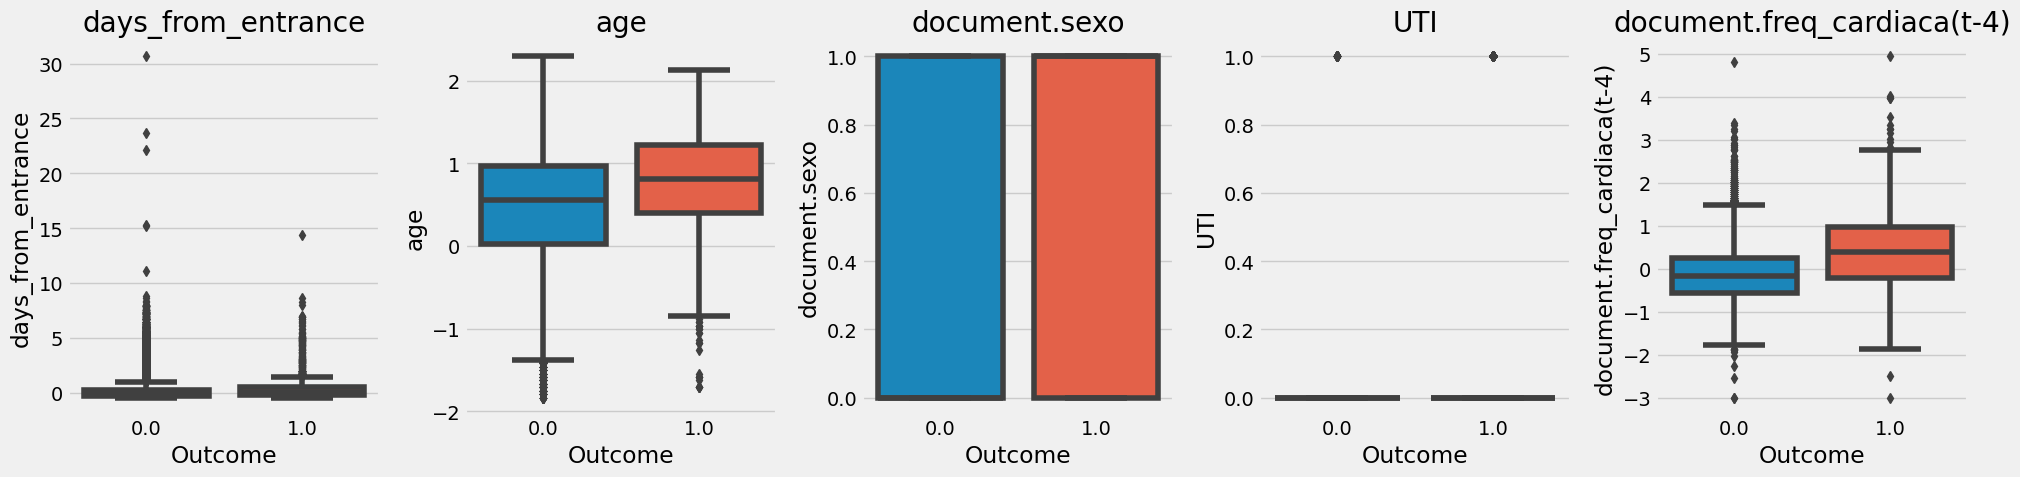

In [57]:
n_features = len(selected_features[:-1])
nrows = 1  
ncols = math.floor(n_features // 2)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[:ncols]):  
    sns.boxplot(data=dataset_t4, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

5


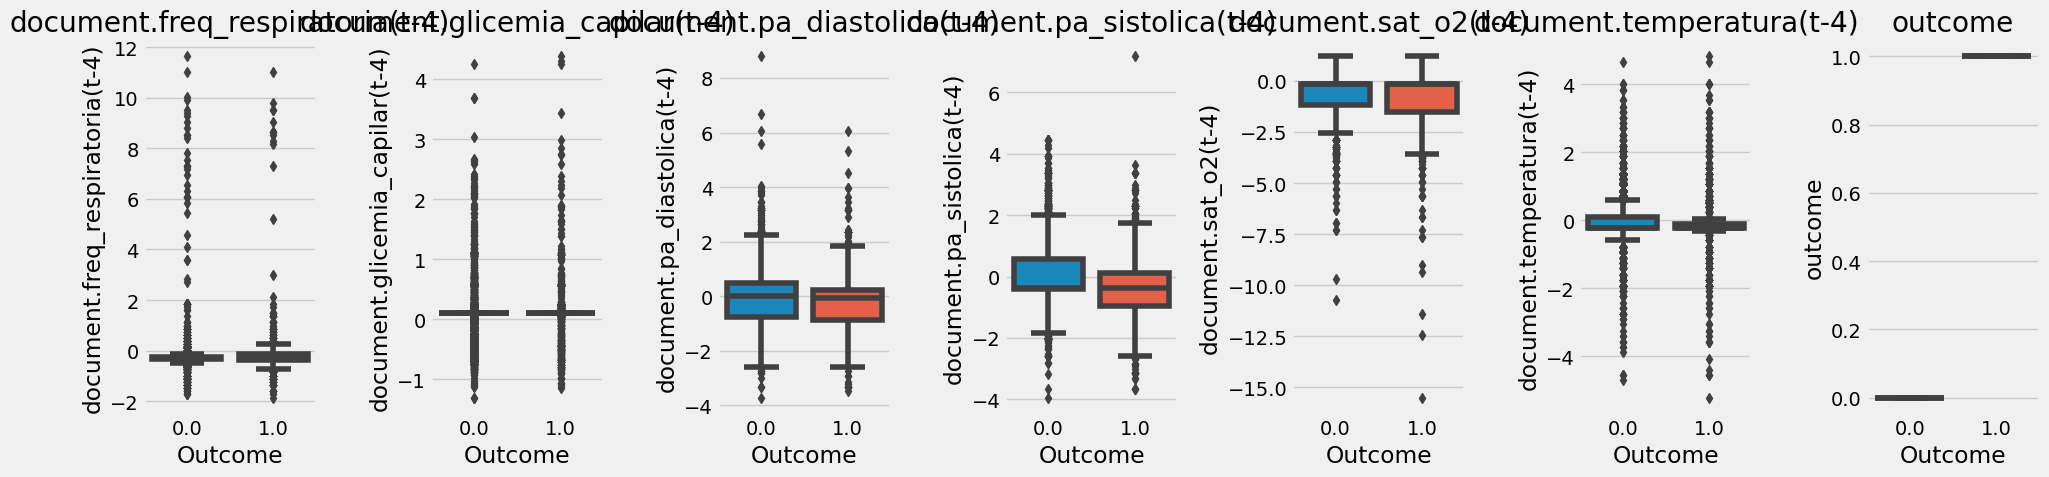

In [58]:
n_features = len(selected_features[:-1])
n_cols = n_features//2
n_rows = 1
print(n_cols)

remaining_features = selected_features[n_cols:]
fig, axes = plt.subplots(1, len(remaining_features), figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[ncols:n_features+1]):  
    sns.boxplot(data=dataset_t4, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

In [59]:
## 시점이 t-1일 때
need_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI', 
    'outcome'
]

dataset_t1 = dataset.filter(like="(t-1)", axis=1)
dataset_t1 = pd.concat([dataset_t1, dataset[need_features]], axis = 1)
dataset_t1.head()

,document.freq_cardiaca(t-1),document.freq_respiratoria(t-1),document.glicemia_capilar(t-1),document.pa_diastolica(t-1),document.pa_sistolica(t-1),document.sat_o2(t-1),document.temperatura(t-1),days_from_entrance,age,document.sexo,UTI,outcome
0,0.337252,-0.345064,-0.061880,-0.111750,-0.392523,-0.581133,-0.179026,0.481160,-0.430375,1.0,0.0,0.0
1,1.601233,-0.205898,-0.061880,-0.940217,-1.506366,-0.466404,-0.179026,1.837695,0.230175,1.0,0.0,0.0
2,0.403377,-0.084457,-0.064406,-0.061465,-0.024832,-0.466404,-0.179026,0.226810,-0.719366,1.0,0.0,0.0
3,0.823398,0.211600,-0.064406,1.545185,1.278242,-0.466404,-0.179026,-0.366674,1.716413,1.0,0.0,0.0
4,-0.537812,-0.345064,-0.064406,-1.768685,-1.506366,-0.466404,-0.179026,-0.366674,1.262285,0.0,0.0,1.0


In [60]:
selected_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI',                 
    'document.freq_cardiaca(t-1)',  
    'document.freq_respiratoria(t-1)',  
    'document.glicemia_capilar(t-1)',  
    'document.pa_diastolica(t-1)',    
    'document.pa_sistolica(t-1)',     
    'document.sat_o2(t-1)',           
    'document.temperatura(t-1)',       
    'outcome'
]

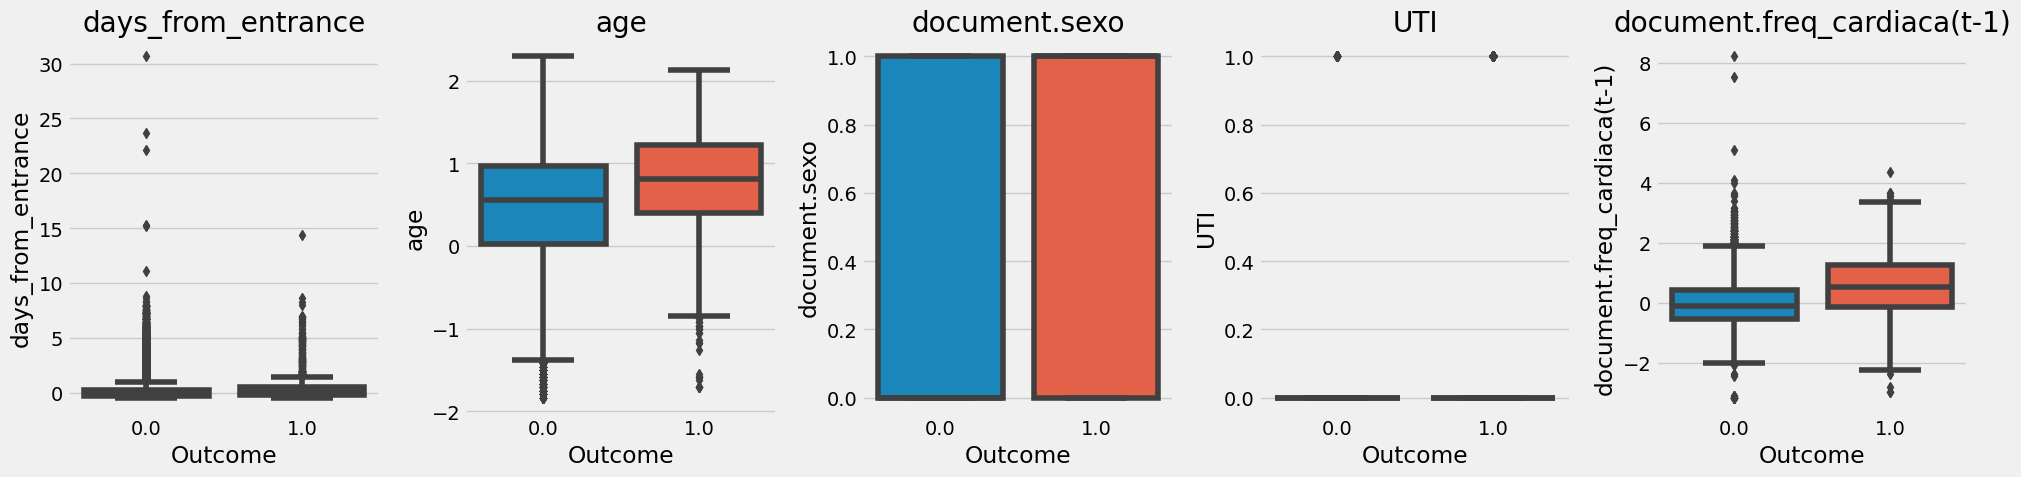

In [61]:
n_features = len(selected_features[:-1])
nrows = 1  
ncols = math.floor(n_features // 2)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[:ncols]):  
    sns.boxplot(data=dataset_t1, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

5


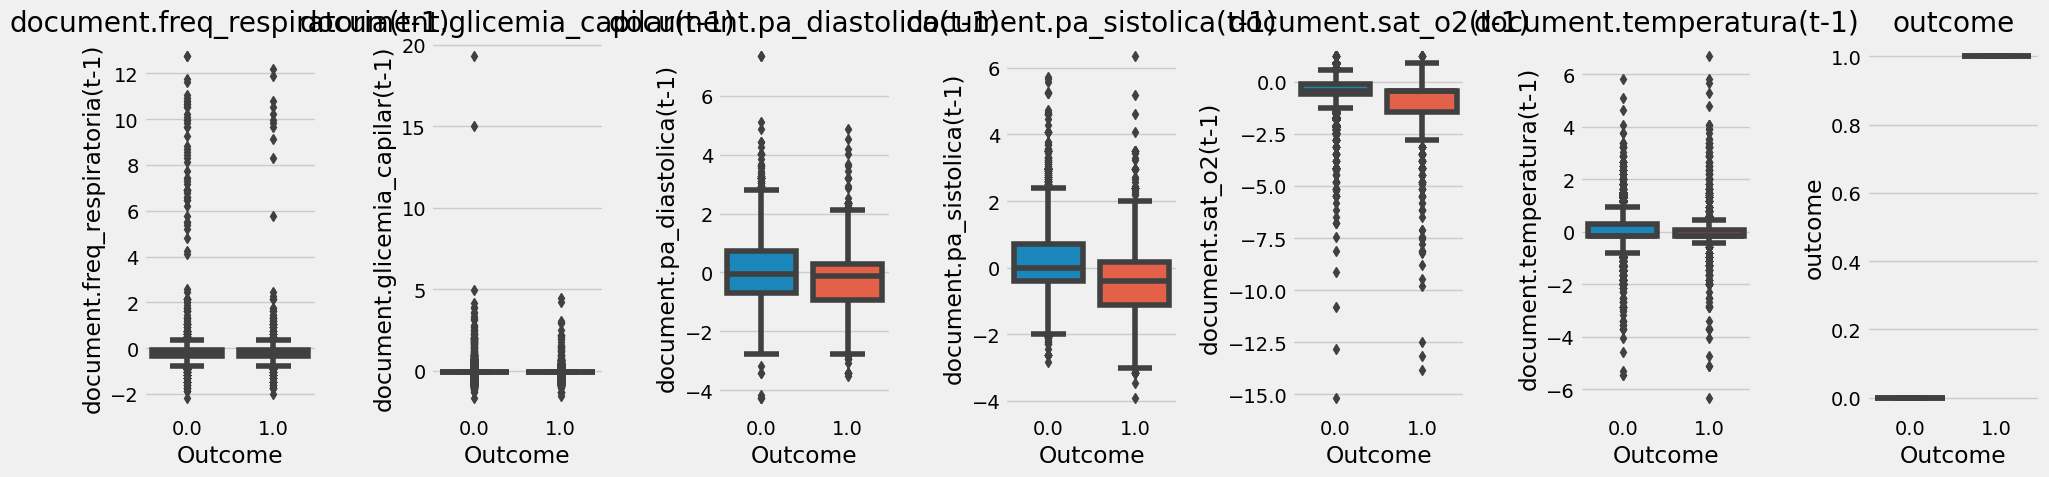

In [62]:
n_features = len(selected_features[:-1])
n_cols = n_features//2
n_rows = 1
print(n_cols)

remaining_features = selected_features[n_cols:]
fig, axes = plt.subplots(1, len(remaining_features), figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[ncols:n_features+1]):  
    sns.boxplot(data=dataset_t1, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

In [63]:
## 시점이 t-2일 때
need_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI', 
    'outcome'
]

dataset_t2 = dataset.filter(like="(t-2)", axis=1)
dataset_t2 = pd.concat([dataset_t2, dataset[need_features]], axis = 1)
dataset_t2.head()

,document.freq_cardiaca(t-2),document.freq_respiratoria(t-2),document.glicemia_capilar(t-2),document.pa_diastolica(t-2),document.pa_sistolica(t-2),document.sat_o2(t-2),document.temperatura(t-2),days_from_entrance,age,document.sexo,UTI,outcome
0,0.349323,-0.358786,-0.126907,0.018549,-0.237325,-0.827232,-0.200408,0.481160,-0.430375,1.0,0.0,0.0
1,1.473310,-0.306113,-0.126907,-0.938324,-0.566726,-0.321086,-0.200408,1.837695,0.230175,1.0,0.0,0.0
2,0.349323,-0.217613,-0.117123,-0.621588,-0.227362,-0.321086,-0.200408,0.226810,-0.719366,1.0,0.0,0.0
3,0.701822,-0.114999,-0.117123,0.497543,0.972657,-0.321086,-0.200408,-0.366674,1.716413,1.0,0.0,0.0
4,-0.415571,-0.358786,-0.117123,-0.929071,-0.566726,-0.321086,-0.200408,-0.366674,1.262285,0.0,0.0,1.0


In [64]:
selected_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI',                 
    'document.freq_cardiaca(t-2)',  
    'document.freq_respiratoria(t-2)',  
    'document.glicemia_capilar(t-2)',  
    'document.pa_diastolica(t-2)',    
    'document.pa_sistolica(t-2)',     
    'document.sat_o2(t-2)',           
    'document.temperatura(t-2)',       
    'outcome'
]

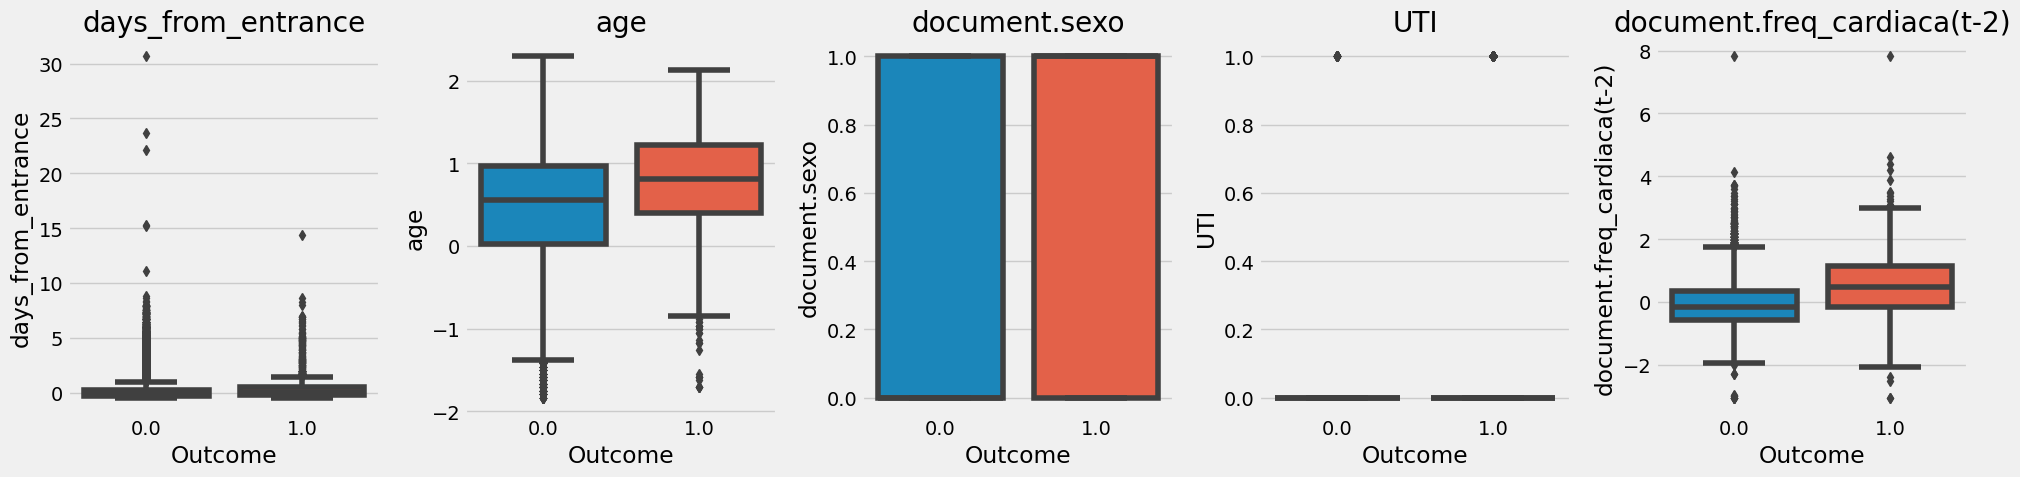

In [65]:
n_features = len(selected_features[:-1])
nrows = 1  
ncols = math.floor(n_features // 2)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[:ncols]):  
    sns.boxplot(data=dataset_t2, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

5


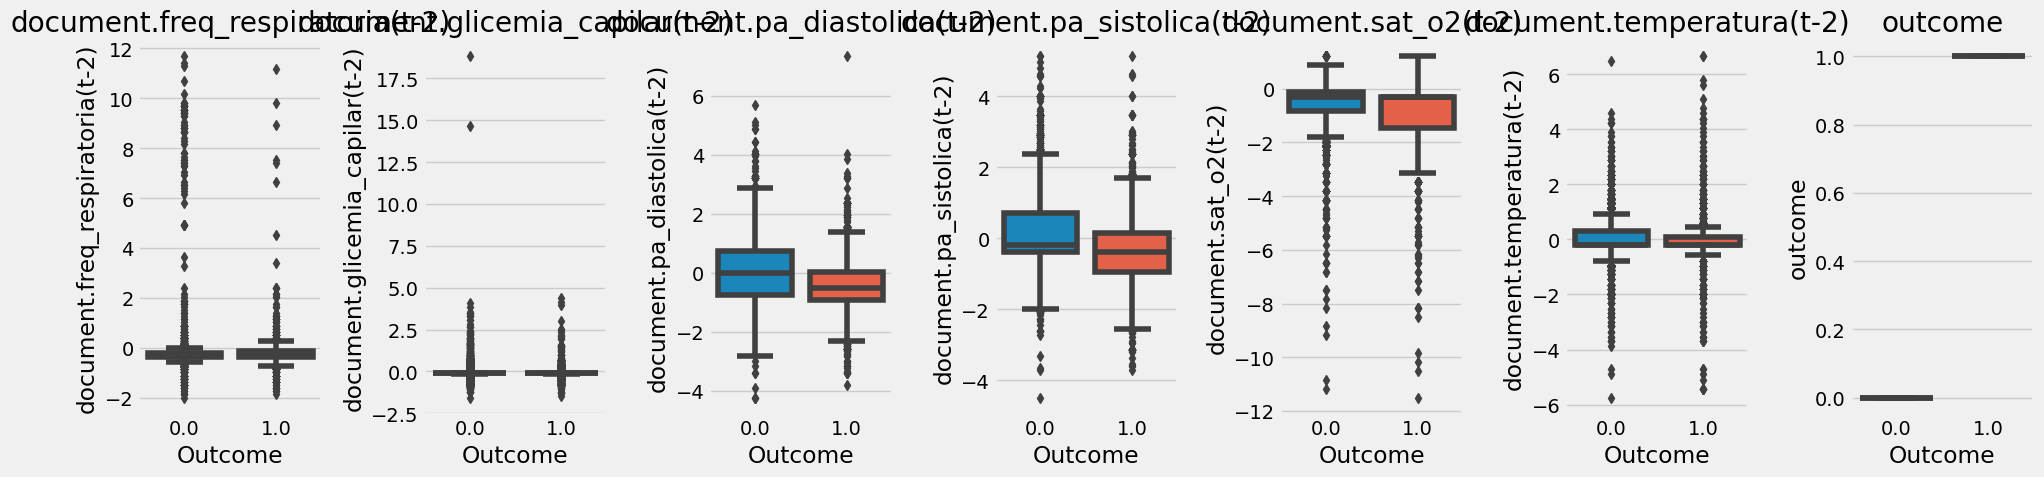

In [66]:
n_features = len(selected_features[:-1])
n_cols = n_features//2
n_rows = 1
print(n_cols)

remaining_features = selected_features[n_cols:]
fig, axes = plt.subplots(1, len(remaining_features), figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[ncols:n_features+1]):  
    sns.boxplot(data=dataset_t2, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

In [68]:
## 시점이 t-3일 때
need_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI', 
    'outcome'
]

dataset_t3 = dataset.filter(like="(t-3)", axis=1)
dataset_t3 = pd.concat([dataset_t3, dataset[need_features]], axis = 1)
dataset_t3.head()

,document.freq_cardiaca(t-3),document.freq_respiratoria(t-3),document.glicemia_capilar(t-3),document.pa_diastolica(t-3),document.pa_sistolica(t-3),document.sat_o2(t-3),document.temperatura(t-3),days_from_entrance,age,document.sexo,UTI,outcome
0,0.368394,-0.381015,-0.035907,-0.007483,-0.136626,-1.533416,-0.290315,0.481160,-0.430375,1.0,0.0,0.0
1,1.576802,-0.381015,-0.035907,-0.949825,-0.269267,-1.144236,-0.290315,1.837695,0.230175,1.0,0.0,0.0
2,0.368394,-0.184773,-0.035907,-0.009744,-0.084209,-1.144236,-0.290315,0.226810,-0.719366,1.0,0.0,0.0
3,0.778084,-0.164346,-0.035907,0.708717,0.900910,-1.144236,-0.290315,-0.366674,1.716413,1.0,0.0,0.0
4,-0.812491,-0.381015,-0.035907,-0.949825,-0.269267,-1.144236,-0.290315,-0.366674,1.262285,0.0,0.0,1.0


In [69]:
selected_features = [
    'days_from_entrance',  
    'age',                 
    'document.sexo',       
    'UTI',                 
    'document.freq_cardiaca(t-3)',  
    'document.freq_respiratoria(t-3)',  
    'document.glicemia_capilar(t-3)',  
    'document.pa_diastolica(t-3)',    
    'document.pa_sistolica(t-3)',     
    'document.sat_o2(t-3)',           
    'document.temperatura(t-3)',       
    'outcome'
]

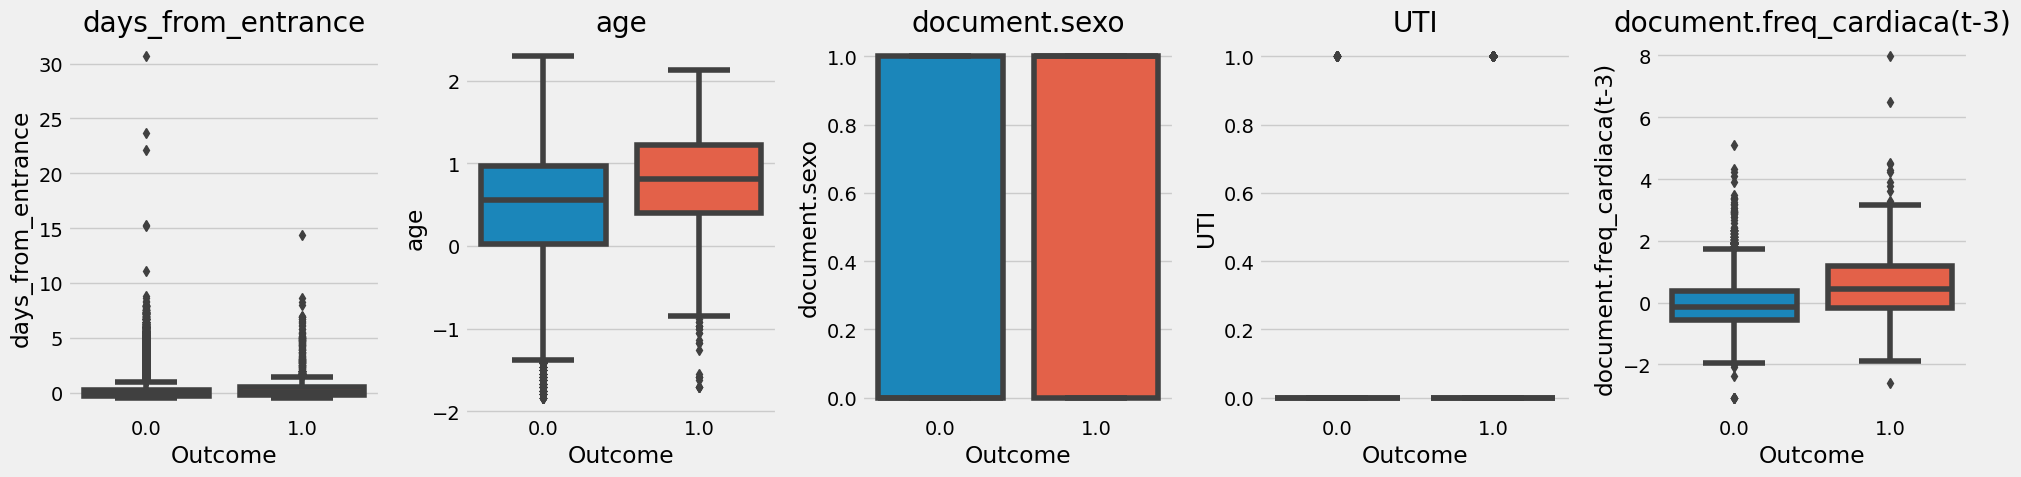

In [70]:
n_features = len(selected_features[:-1])
nrows = 1  
ncols = math.floor(n_features // 2)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[:ncols]):  
    sns.boxplot(data=dataset_t3, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()

5


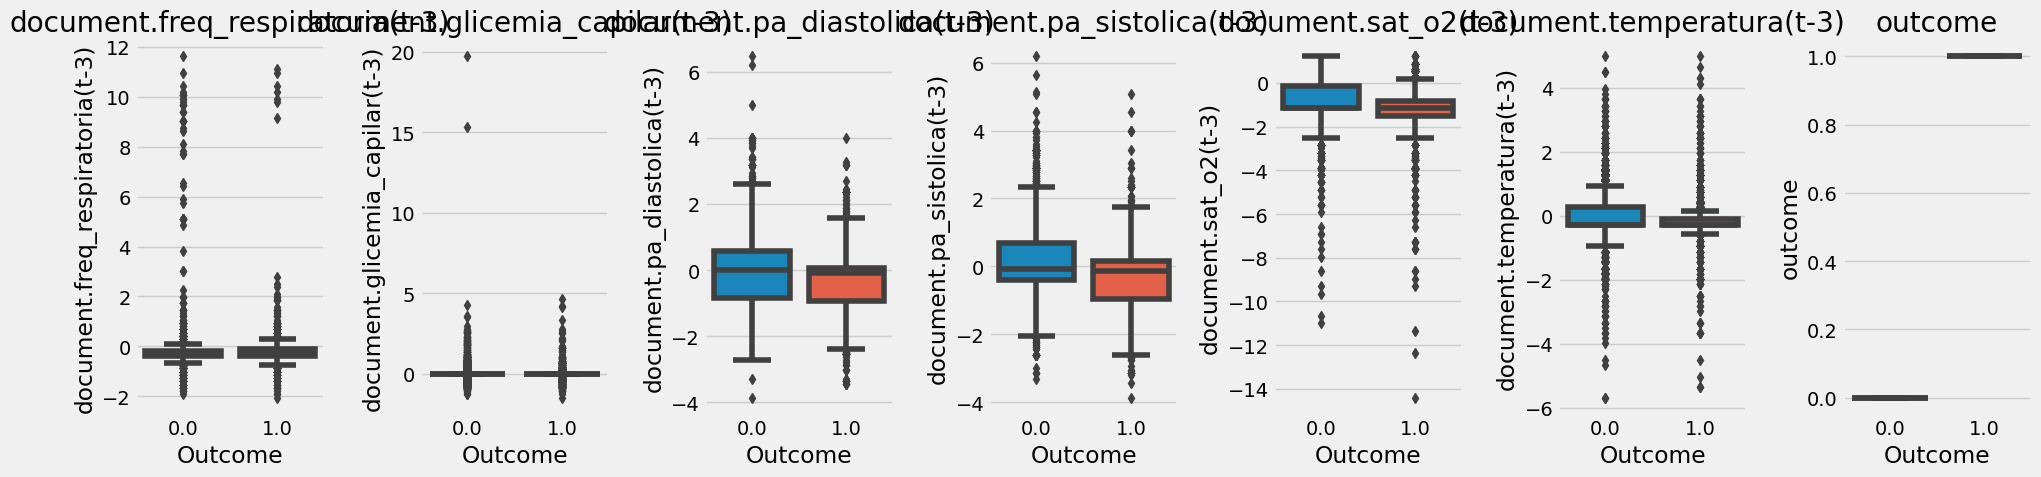

In [71]:
n_features = len(selected_features[:-1])
n_cols = n_features//2
n_rows = 1
print(n_cols)

remaining_features = selected_features[n_cols:]
fig, axes = plt.subplots(1, len(remaining_features), figsize=(20, 5), dpi=100)  
axes = axes.flatten() 

for idx, feature in enumerate(selected_features[ncols:n_features+1]):  
    sns.boxplot(data=dataset_t3, x='outcome', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(feature)


plt.tight_layout()
plt.show()